In [53]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib as mlt
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from IPython.display import Image

import yfinance as yf
from urllib.parse import urlencode
from pandas_datareader import data as pdr
yf.pdr_override()


import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from keras.metrics import *

In [21]:
## Reading forex paring raw data !

eur_jpy = pd.read_csv('data/eurjpy_2015_2020.csv', index_col=['date'], parse_dates=['date'])
eur_usd = pd.read_csv('data/eurusd_2015_2020.csv', index_col=['date'], parse_dates=['date'])
eur_gbp = pd.read_csv('data/eurgbp_2015_2020.csv', index_col=['date'], parse_dates=['date'])

gbp_jpy = pd.read_csv('data/gbpjpy_2015_2020.csv', index_col=['date'], parse_dates=['date'])
gbp_usd = pd.read_csv('data/gbpusd_2015_2020.csv', index_col=['date'], parse_dates=['date'])

## Reading S&P 500 and CBOE raw data !

SP500 = pd.read_csv('data/GSPC_2015_2020.csv')
VIX = pd.read_csv('data/VIX_2015_2020.csv')

In [20]:
# tickers = ['EURUSD=X', 'EURJPY=X', 'GBPJPY=X', 'EURGBP=X', 'GBPUSD=X']
# for df in [eur_jpy, eur_usd, eur_gbp, gbp_jpy, gbp_usd]:
    

In [19]:
# # Tickers
# tickers = ['^GSPC', '^VIX', '^TNX', 'EURUSD=X', 'EURJPY=X', 'GBPJPY=X', 'EURGBP=X', 'GBPUSD=X']

# # dates
# startdate = '2015-1-1'
# train_end = '2017-12-31'
# test_start = '2018-01-01'
# enddate = '2018-12-31'

# # data Close
# data_close = pdr.get_data_yahoo(tickers, start=startdate, end=enddate)
# print('\n--- Full dataset')
# display(data_close)

# # data returns
# data = data_close.shift(1) / data_close - 1
# print('\n--- Full dataset returns')
# display(data)

# # Sets
# data_train = data[startdate:train_end].dropna()
# data_test = data[test_staArt:enddate].dropna()
# print('\n--- Train set unadjusted')
# display(data_train)
# print('\n--- Test set unadjusted')
# display(data_test)

# # mu sigma train
# mu_train = data_train.mean()
# sigma_train = data_train.std()
# print('\n--- mu train:')
# display(pd.DataFrame(mu_train, columns=['Train set Mean']))
# print('\n--- sigma train:')
# display(pd.DataFrame(sigma_train, columns=['Train set st dev']))

# # Final sets
# data_train_prod = (data_train - mu_train) / sigma_train
# data_test_prod = (data_test - mu_train) / sigma_train
# print('\n--- Train set adjusted')
# display(data_train_prod)
# print('\n--- Test set adjusted')
# display(data_test_prod)

In [125]:
# for i in list(data_train_prod.columns):
#     plot(data_train_prod, column = i , type = str(i) + ' Train')
#     plot(data_test_prod, column = i , type = str(i) + ' Test')

In [126]:
for df in [SP500, VIX]:
    fig = go.Figure(data=go.Ohlc(x=df['Date'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close']))
    fig.update(layout_xaxis_rangeslider_visible=False)
    fig.show()

In [124]:
for df in [eur_jpy, eur_usd, eur_gbp, gbp_jpy, gbp_usd]:
    fig = go.Figure(data=go.Ohlc(x=df.index,
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close']))

    fig.show()

In [127]:
# for df in [eur_jpy, eur_usd, eur_gbp, gbp_jpy, gbp_usd]:
#     display(df.describe())
#     display(df.info())

# Data Preparation

In [11]:
def plot(df, column = '' , type = ''):
    plt.figure(figsize=(16,4))
    _ = plt.title( type + " Daily Close returns")
    _ = plt.plot(df[column])
    _ = plt.axhline(y=np.mean(df[column]), color='red', linestyle='--')

## Filters out filtered sorted data frame !
def filter_data(dataframe , train_start_date, train_end_date, test_start_date, test_end_date):
    
    train = dataframe[(dataframe.index >= train_start_date) & (dataframe.index <= train_end_date)]
    train = train.sort_index()
    train = (train.diff(1)/train.shift(1)).dropna()
             
    mean_train = np.mean(train)
    std_train = np.std(train)       
    train  = (train - mean_train)/std_train
             
    test = dataframe[(dataframe.index >= test_start_date) & (dataframe.index <= test_end_date)]
    test = test.sort_index()
    test = (test.diff(1)/test.shift(1)).dropna()      
    test = (test-mean_train)/std_train
     
    print('Train')    
    display(train.head())
    plot(train, 'close', 'Train')
    print()
    
    print('Test')
    display(test.head())
    plot(test, 'close', 'Test')
    return(train, test)

# LSTM Code

Train


open      high       low     close
date                                              
2016-01-04  0.149505  0.011267 -2.273356 -1.656817
2016-01-05 -1.786175 -1.645265 -1.408248 -1.355700
2016-01-06 -1.327517 -1.713627 -0.610446 -0.563424
2016-01-07 -0.540263  0.574914 -0.277349  0.978196
2016-01-08  0.947577  0.586114  1.467766 -0.476606


Test


open      high       low     close
date                                              
2018-01-02  0.113594  0.352536 -0.123788  0.037242
2018-01-03  0.026843 -0.171688 -0.137549 -0.179009
2018-01-04 -0.179041  1.068226  0.409991  1.095282
2018-01-05  1.083276  0.319801  0.825269 -0.206754
2018-01-08 -0.061742 -0.406028 -0.901615 -0.648910

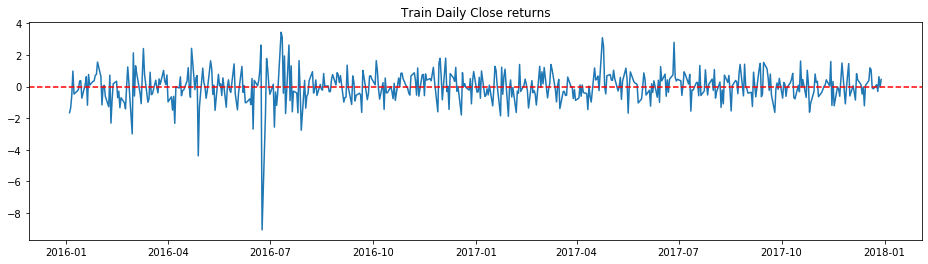

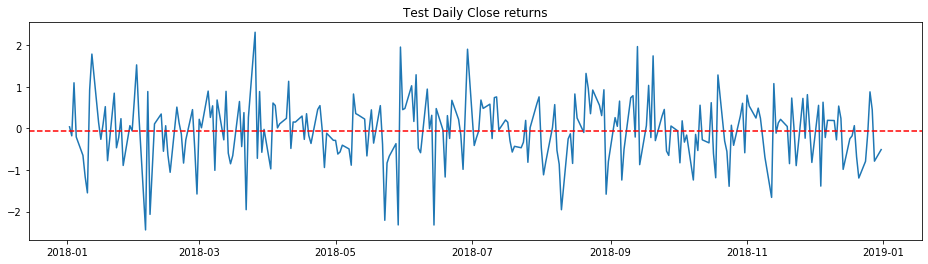

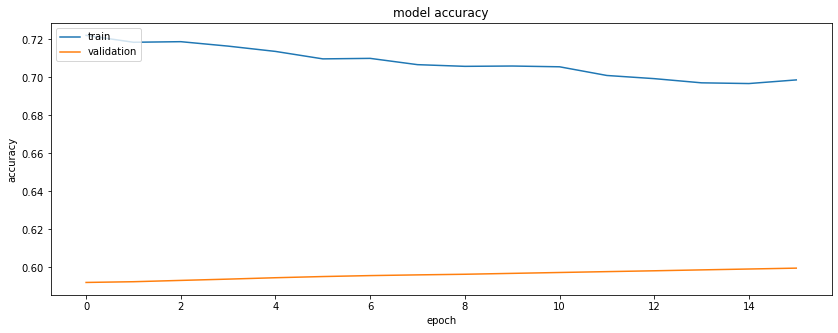

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 25)                4200      
_________________________________________________________________
dropout_22 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 26        
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________
Train Mean Absolute Error: tf.Tensor(0.69404674, shape=(), dtype=float32)
Train Root Mean Squared Error: 0.9850815
Test Mean Absolute Error: tf.Tensor(0.5996041, shape=(), dtype=float32)
Test Root Mean Squared Error: 0.7758363
MASE Train: tf.Tensor(0.6695773, shape=(), dtype=float32)
MASE Test: tf.Tensor(0.6909624, shape=(), dtype=float32)
Train


open      high       low     close
date                                              
2016-01-04  0.016938  1.510008 -1.564187 -0.601269
2016-01-05 -0.755363 -2.028075 -1.474070 -1.530216
2016-01-06 -1.457262 -0.791914  0.079825  0.385695
2016-01-07  0.360131  2.610314  1.094376  2.812385
2016-01-08  2.752983 -0.227901  0.583796 -0.080749


Test


open      high       low     close
date                                              
2018-01-02  0.165054  1.039745  0.139316  0.706460
2018-01-03  0.692976 -0.294442 -0.060114 -0.858067
2018-01-04 -0.854414  0.361879  0.012356  1.020303
2018-01-05  1.034149 -0.159828  0.247813 -0.822453
2018-01-08 -0.734720 -0.563410 -1.217788 -1.051555

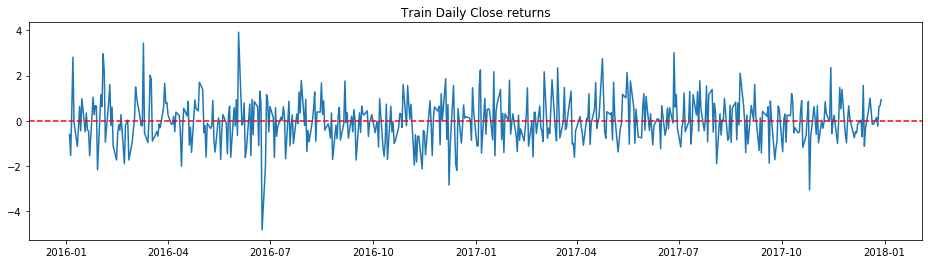

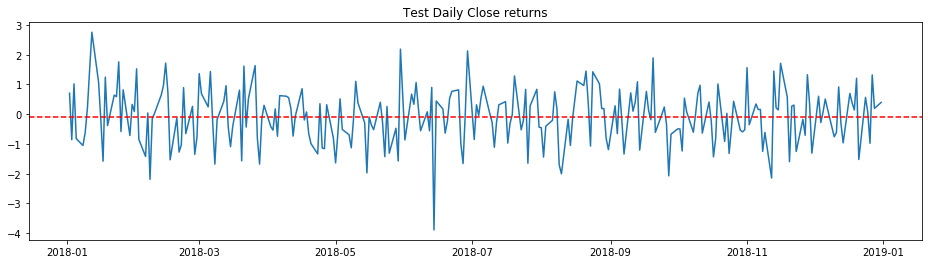

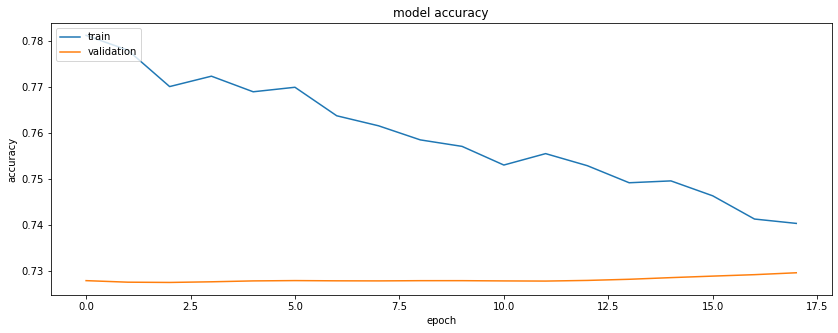

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 25)                4200      
_________________________________________________________________
dropout_23 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 26        
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________
Train Mean Absolute Error: tf.Tensor(0.73964655, shape=(), dtype=float32)
Train Root Mean Squared Error: 0.9788218
Test Mean Absolute Error: tf.Tensor(0.72962713, shape=(), dtype=float32)
Test Root Mean Squared Error: 0.92153215
MASE Train: tf.Tensor(0.65179867, shape=(), dtype=float32)
MASE Test: tf.Tensor(0.67423964, shape=(), dtype=float32)
Train


open      high       low     close
date                                              
2016-01-04 -0.037404  0.972513 -0.369113 -0.336442
2016-01-05 -0.367948 -1.259726 -0.862793 -0.720973
2016-01-06 -0.699795  0.246215  0.100769  0.754617
2016-01-07  0.731899  2.040622  0.972684  2.093285
2016-01-08  2.030743  0.877826  1.271057  1.096918


Test


open      high       low     close
date                                              
2018-01-02 -0.040919  0.311116 -0.375321 -0.289263
2018-01-03 -0.280953 -0.357321 -0.278537  0.223548
2018-01-04  0.233829  0.344395  0.559414  0.311353
2018-01-05  0.284683 -0.273734 -0.452839 -0.817282
2018-01-08 -0.759123 -0.641479 -0.940391 -0.891783

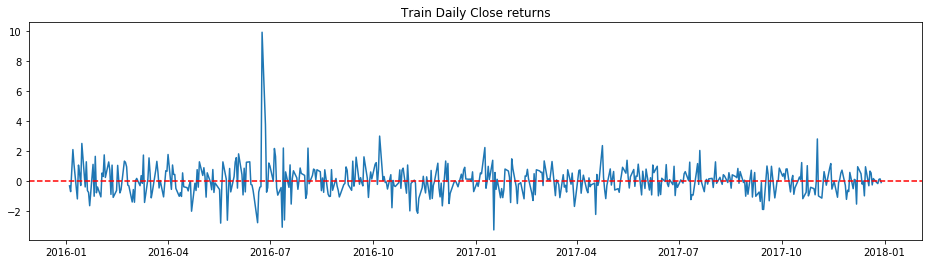

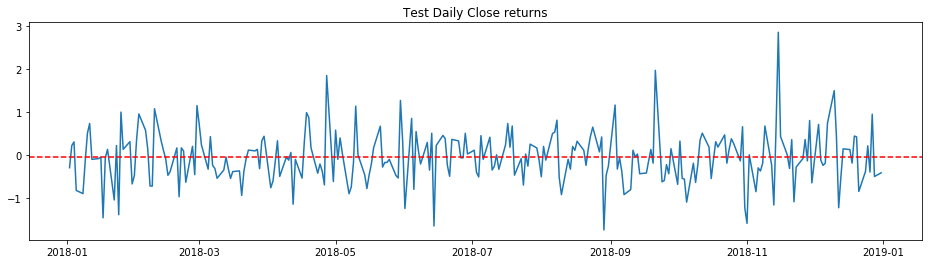

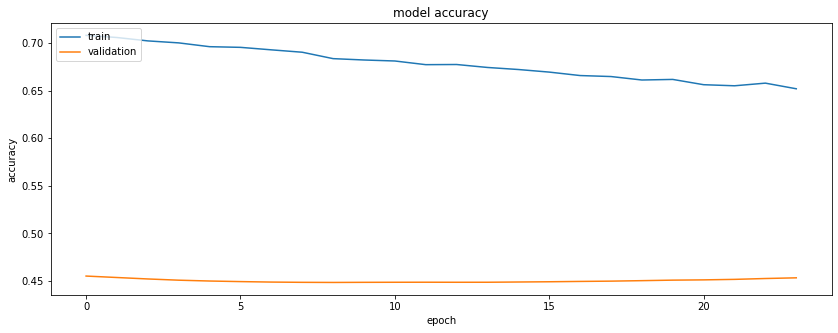

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 25)                4200      
_________________________________________________________________
dropout_24 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 26        
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________
Train Mean Absolute Error: tf.Tensor(0.6489699, shape=(), dtype=float32)
Train Root Mean Squared Error: 0.9626367
Test Mean Absolute Error: tf.Tensor(0.453184, shape=(), dtype=float32)
Test Root Mean Squared Error: 0.6026346
MASE Train: tf.Tensor(0.64876586, shape=(), dtype=float32)
MASE Test: tf.Tensor(0.71775275, shape=(), dtype=float32)
Train


open      high       low     close
date                                              
2016-01-04  0.038288 -0.035147 -1.176404 -0.946580
2016-01-05 -0.916037 -0.717450 -0.463660 -0.419918
2016-01-06 -0.419679 -0.720682 -0.534367 -0.881487
2016-01-07 -0.866756 -0.723947 -1.309296 -0.731572
2016-01-08 -0.703466 -0.212320 -0.360635 -1.019364


Test


open      high       low     close
date                                              
2018-01-02  0.118116  0.288064 -0.040425  0.294254
2018-01-03  0.242702  0.088839 -0.046936 -0.281379
2018-01-04 -0.281847  0.136099  0.220994  0.519852
2018-01-05  0.520340  0.500367  0.486754  0.439084
2018-01-08  0.475650  0.050701  0.082083  0.106855

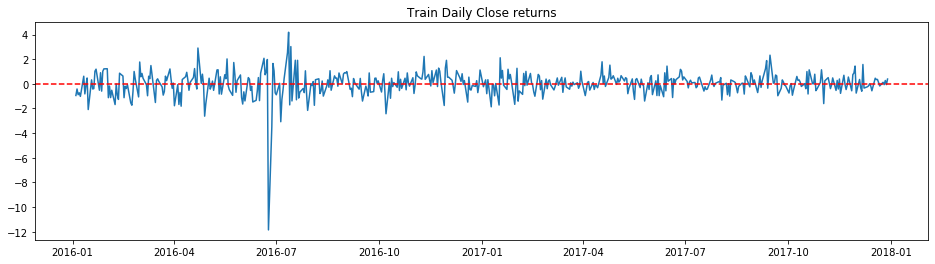

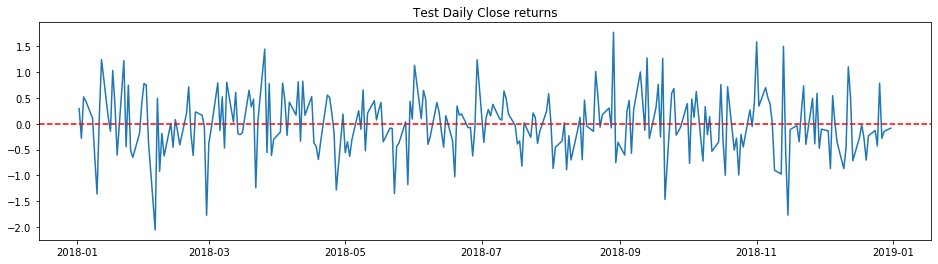

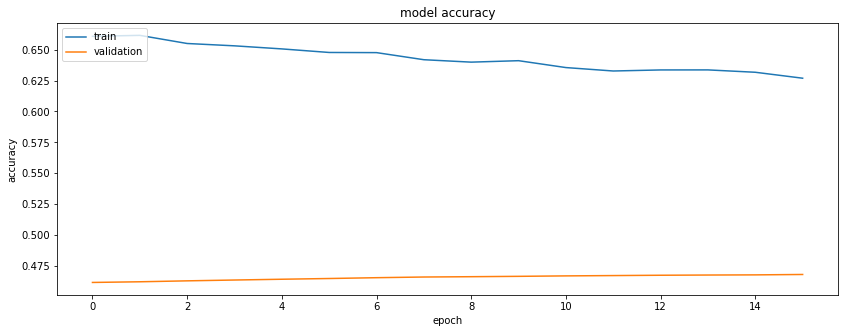

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 25)                4200      
_________________________________________________________________
dropout_25 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 26        
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________
Train Mean Absolute Error: tf.Tensor(0.6264759, shape=(), dtype=float32)
Train Root Mean Squared Error: 0.98489124
Test Mean Absolute Error: tf.Tensor(0.46793264, shape=(), dtype=float32)
Test Root Mean Squared Error: 0.60213196
MASE Train: tf.Tensor(0.66407204, shape=(), dtype=float32)
MASE Test: tf.Tensor(0.6917431, shape=(), dtype=float32)
Train


open      high       low     close
date                                              
2016-01-04  0.030188  0.694173 -0.630626 -0.141662
2016-01-05 -0.147533 -0.877066 -0.219222 -0.379698
2016-01-06 -0.363137 -0.406284 -0.321164 -0.438089
2016-01-07 -0.439340 -0.397581 -0.608844  0.029462
2016-01-08  0.030257  0.070332 -0.230677 -0.994730


Test


open      high       low     close
date                                              
2018-01-02  0.163777  0.874192  0.150454  0.807265
2018-01-03  0.816404  0.160104 -0.079725 -0.793990
2018-01-04 -0.780312 -0.548482  0.110386  0.403302
2018-01-05  0.398248  0.268276  0.210357  0.185237
2018-01-08  0.234457  0.041942  0.020299  0.071499

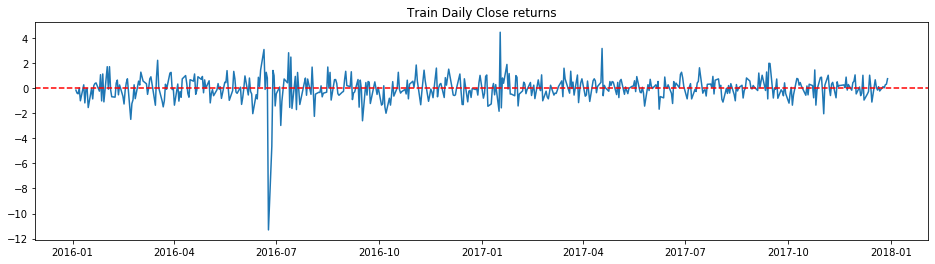

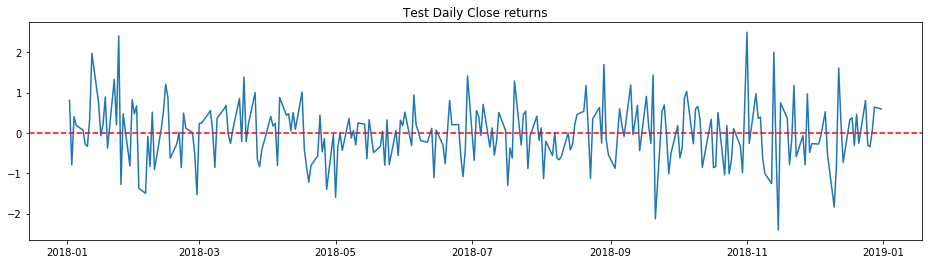

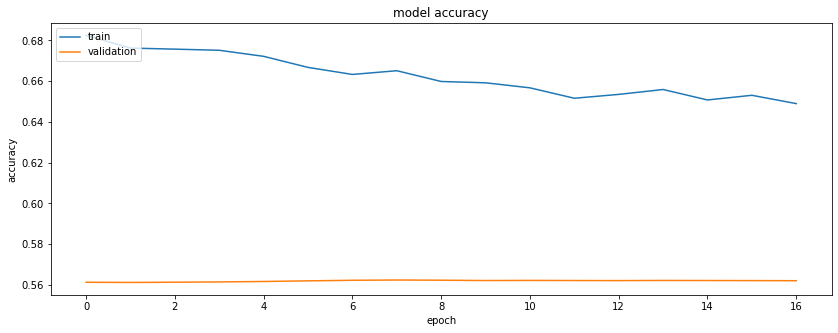

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 25)                4200      
_________________________________________________________________
dropout_26 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 26        
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________
Train Mean Absolute Error: tf.Tensor(0.64466584, shape=(), dtype=float32)
Train Root Mean Squared Error: 0.9890856
Test Mean Absolute Error: tf.Tensor(0.56207967, shape=(), dtype=float32)
Test Root Mean Squared Error: 0.7203829
MASE Train: tf.Tensor(0.6626131, shape=(), dtype=float32)
MASE Test: tf.Tensor(0.68376374, shape=(), dtype=float32)


In [119]:
for df in [eur_jpy, eur_usd, eur_gbp, gbp_jpy, gbp_usd]:

    train, test = filter_data(dataframe= df, train_start_date='2016-01-01', train_end_date='2017-12-31', 
                          test_start_date='2018-01-01', test_end_date='2018-12-31')

    train = np.array(train['close'])
    test = np.array(test['close'])
    np.shape(train)
    np.shape(test)




    train = np.reshape(train, (-1, 1))
    test = np.reshape(test, (-1, 1))

    def create_dataset(dataset, look_back=1):
        X, Y = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            X.append(a)
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)

    look_back = 16  ## According to eric tu ## parameter
    X_train, Y_train = create_dataset(train, look_back)
    X_test, Y_test = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


    model = Sequential()
    model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')

    history = model.fit(X_train, Y_train, epochs=500, batch_size=90, validation_data=(X_test, Y_test), 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=15)],
    #                       callbacks=[plot_losses]
                        verbose=0, shuffle=False)

    plt.figure(figsize=(14,5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')

    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    model.summary()



    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    print('Train Mean Absolute Error:', mean_absolute_error(Y_train, train_predict[:,0]))
    print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train, train_predict[:,0])))
    print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict[:,0]))
    print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict[:,0])))
    print('MASE Train:', mean_absolute_error(Y_train, train_predict[:,0])/(np.abs(Y_train[1:]-Y_train[:-1]).sum()/(len(Y_train)-1)))
    print('MASE Test:', mean_absolute_error(Y_test, test_predict[:,0])/(np.abs(Y_test[1:]-Y_test[:-1]).sum()/(len(Y_test)-1)))

In [128]:
train = np.reshape(train, (-1, 1))
test = np.reshape(test, (-1, 1))

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 16  ## According to eric tu ## parameter
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

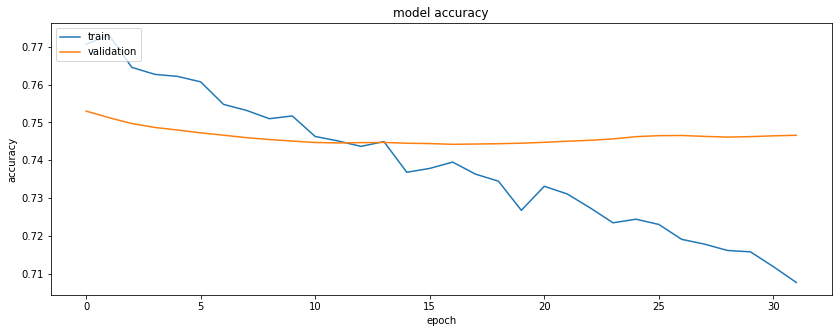

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 25)                4200      
_________________________________________________________________
dropout_20 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 26        
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________


In [81]:
model = Sequential()
model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=500, batch_size=90, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=15)],
#                       callbacks=[plot_losses]
                    verbose=0, shuffle=False)

plt.figure(figsize=(14,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

model.summary()

In [117]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print('Train Mean Absolute Error:', mean_absolute_error(Y_train, train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train, train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict[:,0])))
print('MASE Train:', mean_absolute_error(Y_train, train_predict[:,0])/(np.abs(Y_train[1:]-Y_train[:-1]).sum()/(len(Y_train)-1)))
print('MASE Test:', mean_absolute_error(Y_test, test_predict[:,0])/(np.abs(Y_test[1:]-Y_test[:-1]).sum()/(len(Y_test)-1)))

Train Mean Absolute Error: tf.Tensor(0.7064802, shape=(), dtype=float32)
Train Root Mean Squared Error: 0.95808023
Test Mean Absolute Error: tf.Tensor(0.7465936, shape=(), dtype=float32)
Test Root Mean Squared Error: 0.9381875
MASE Train: tf.Tensor(0.62257147, shape=(), dtype=float32)
MASE Test: tf.Tensor(0.68991816, shape=(), dtype=float32)


In [293]:
def cal_mase(train,
             test,
             forecasted):
    mas = mean_absolute_error(forecasted, test)
    mas_naive = np.abs(train[1:] - train[:-1]).sum() / (len(train) - 1)
    return mas / mas_naive

In [270]:
def MASE(training_series, testing_series, prediction_series):
    print("Needs to be tested.")
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

In [271]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name